In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader

from scipy import ndimage as ndi
from scipy import fft, ifft
import scipy

from skimage import data
from skimage import io, transform, color
from skimage.util import img_as_float, pad
from skimage.filters import gabor_kernel

import pickle 
import os
import sys
import h5py
import warnings
import time
import json
import nibabel as nib

import gfb_utils as g
import nsd_utils as n

sys.path.append('/user_data/mmhender/coco_annot/cocoapi/PythonAPI/')
from pycocotools.coco import COCO

(200, 200, 324)


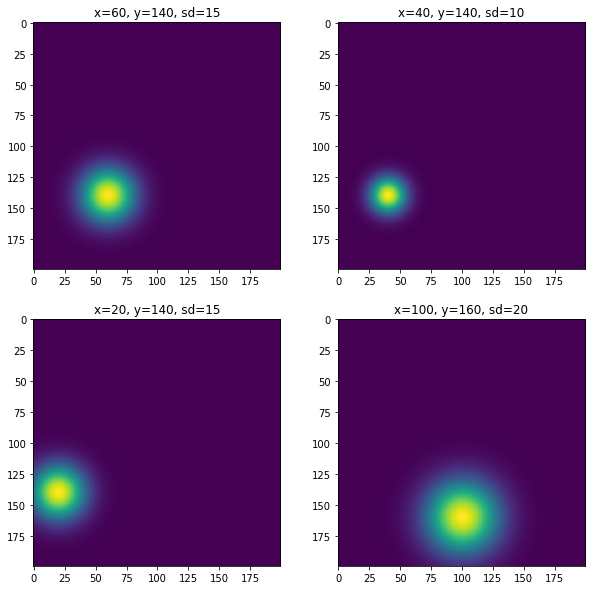

In [2]:
## visualize the candidate RFs here

sizes = np.arange(5, 21, 5)
x_centers = np.arange(20, 181, 20)
y_centers = np.arange(20, 181, 20)
process_at_size = [200,200]

rf_stack, x_list, y_list, size_list  = g.get_rf_stack(x_centers, y_centers, sizes, process_at_size)

print(np.shape(rf_stack))

plt.figure(figsize=(10,10));
for pi, ii in enumerate(np.random.randint(0, len(rf_stack), 4)):
    plt.subplot(2,2,pi+1)
    plt.imshow(rf_stack[:,:,ii])
    plt.title('x=%d, y=%d, sd=%d'%(x_list[ii], y_list[ii],size_list[ii]))

In [2]:
## Making the filters here:

# First define the feature bank itself
freqs_cpp = np.round(np.logspace(np.log10(0.02), np.log10(0.25), 3),2)
orient_step = 45
orients_deg = np.arange(0,181-orient_step, orient_step)
spat_freq_bw = 1
spat_aspect_ratio = 1
n_sd_out = 7

# Specify stuff about images
nSamples = 10
nsd_inds=np.arange(0,nSamples,1)
process_at_size = [200,200]

bank = g.filter_bank(orients_deg, freqs_cpp, spat_freq_bw, spat_aspect_ratio, n_sd_out, image_size = process_at_size)

all_feat = g.get_nsd_gabor_feat(nsd_inds, bank)
                            
print(np.shape(all_feat))    
# Create set of candidate RFs
sizes = np.arange(5, 21, 5)
x_centers = np.arange(20, 181, 20)
y_centers = np.arange(20, 181, 20)
rf_stack, x_list, y_list, size_list  = g.get_rf_stack(x_centers, y_centers, sizes, process_at_size)

# Making a full matrix, [nIms x nFeatures x nRFs]
feats_by_rfs = g.get_feats_by_rfs(all_feat, rf_stack)

print(np.shape(feats_by_rfs))
nFeats = np.shape(feats_by_rfs)[1]
nRFs = np.shape(feats_by_rfs)[2]

loading image 0 of 10
filtering image 0 of 10
making filters
size of filter stack will be:
(600, 600, 12)
time elapsed: 0.98 s
loading image 1 of 10
filtering image 1 of 10
filters already made
time elapsed: 0.35 s
loading image 2 of 10
filtering image 2 of 10
filters already made
time elapsed: 0.35 s
loading image 3 of 10
filtering image 3 of 10
filters already made
time elapsed: 0.35 s
loading image 4 of 10
filtering image 4 of 10
filters already made
time elapsed: 0.35 s
loading image 5 of 10
filtering image 5 of 10
filters already made
time elapsed: 0.34 s
loading image 6 of 10
filtering image 6 of 10
filters already made
time elapsed: 0.34 s
loading image 7 of 10
filtering image 7 of 10
filters already made
time elapsed: 0.34 s
loading image 8 of 10
filtering image 8 of 10
filters already made
time elapsed: 0.35 s
loading image 9 of 10
filtering image 9 of 10
filters already made
time elapsed: 0.35 s
(10, 200, 200, 12)
torch.Size([10, 12, 324])


In [4]:
nRFs

324

(0.0, 200.0, 0.0, 200.0)

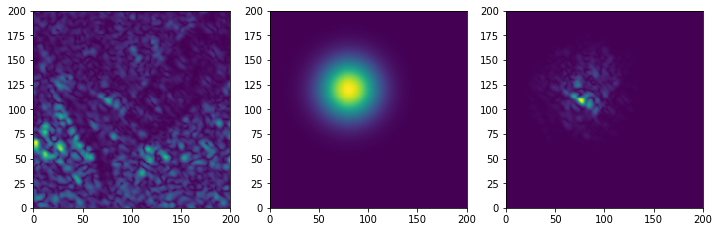

In [5]:

ii=5
ff=5
rf=131

feat_map = all_feat[ii,:,:,ff]
this_rf = rf_stack[:,:,rf]


plt.figure(figsize=(12,12));
plt.subplot(1,3,1)
plt.pcolormesh(feat_map)
plt.axis('square')
plt.subplot(1,3,2)
plt.pcolormesh(tnsd_ind=0

nFilts = np.shape(all_feat)[3]
orient_labs = image_stats['orient_labs']
freq_labs = image_stats['freq_labs']

plt.figure(figsize=(10,20));

plt.subplot(3,2,1)
plt.pcolormesh(np.mean(nsd_im,axis=2))
plt.axis('square')
plt.xticks([])
plt.yticks([])
plt.gca().invert_yaxis()
plt.title('original image')

for ii in range(np.min([nFilts, 5])):
    
    plt.subplot(3,2,2+ii)
    plt.pcolormesh(all_feat[nsd_ind,:,:,ii])
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.title('filtered image: orient = %d deg\nSF = %.2f cpp'%(orient_labs[ii],freq_labs[ii]))
    plt.xticks([])
    plt.yticks([])')
plt.subplot(1,3,3)
plt.pcolormesh(feat_map * this_rf)
plt.axis('square')

filters already made


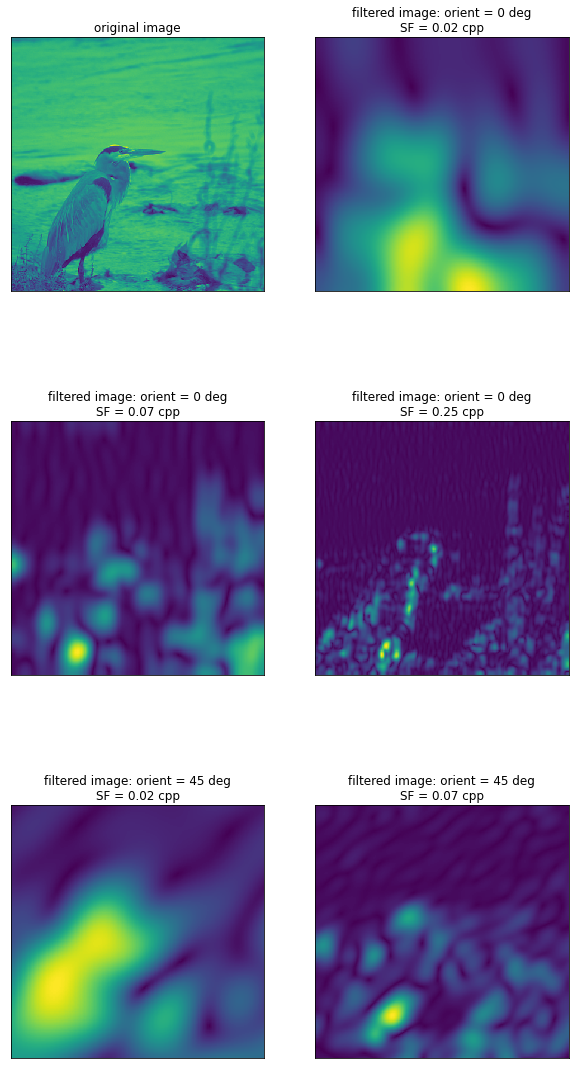

In [13]:

nsd_ind = 7 # index into the 73000 NSD images
# gather metadata for these images and load the one of interest
nsd_brick_file = '/lab_data/tarrlab/common/datasets/NSD/nsddata_stimuli/stimuli/nsd/nsd_stimuli.hdf5'

with h5py.File(nsd_brick_file, "r") as f:
    nsd_im = f['imgBrick'][nsd_ind,:,:,:] 
    
nFilts = np.shape(all_feat)[3]

image_stats, filters_freq = g.filter_whole_image_freq(nsd_im, bank)

orient_labs = image_stats['orient_labs']
freq_labs = image_stats['freq_labs']

plt.figure(figsize=(10,20));

plt.subplot(3,2,1)
plt.pcolormesh(np.mean(nsd_im,axis=2))
plt.axis('square')
plt.xticks([])
plt.yticks([])
plt.gca().invert_yaxis()
plt.title('original image')

for ii in range(np.min([nFilts, 5])):
    
    plt.subplot(3,2,2+ii)
    plt.pcolormesh(all_feat[nsd_ind,:,:,ii])
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.title('filtered image: orient = %d deg\nSF = %.2f cpp'%(orient_labs[ii],freq_labs[ii]))
    plt.xticks([])
    plt.yticks([])